In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import sys
from datetime import datetime
import numpy as np

In [2]:
def get_file_info(filename):
    file_contents = ""
    with open(filename) as f:
        file_contents = [x for x in f]
    file_contents = ''.join(file_contents)
    return file_contents

In [3]:
def read_positions(positions):
    pos_list = positions.split("\n")[:-1]
    new_positions = np.array([pos[1:-1].split(',') for pos in pos_list]).astype(float)
    return new_positions

In [18]:
def create_anim_helper(frame_skip, frame_start, folder):
    layer_size = 40 ** 2
    def anim_helper(frame, plt, ax):
        ax.clear()
        ax.set_facecolor('black')
        ax.set_xlim3d([-1, 2])
        ax.set_xlabel('X')

        ax.set_ylim3d([-1, 2])
        ax.set_ylabel('Y')

        ax.set_zlim3d([-1, 2])
        ax.set_zlabel('Z')

        ax.set_title('3D Fluid')
        # Provide starting angle for the view.
        ax.view_init(25, 60)
#         ax.view_init(90, 0)
        locations = read_positions(get_file_info("fluid_" + str(frame * frame_skip + frame_start) + ".txt"))
        
#         locations = read_positions(get_file_info(folder + "/fluid_particles.txt"))
        x = locations[:, 0].flatten() / 4 + 0.5
        y = locations[:, 1].flatten() / 4 + 0.5
        z = locations[:, 2].flatten() / 4 + 0.5
        
        wrap = lambda x: x if x <= 1 else wrap(x - 1)

#         scatters = [ax.plot(x[i*layer_size:(i+1)*layer_size], y[i*layer_size:(i+1)*layer_size], z[i*layer_size:(i+1)*layer_size], '.', color=(wrap(i/20 + 0.6), wrap(i/30 + 0.3), wrap(i/10), 0.5)) for i in range(40)]
        scatters = [ax.plot(x, y, z, 'b.', alpha=0.7, markersize=1)]
        
        locations = read_positions(get_file_info("bub_diffuse_" + str(frame * frame_skip + frame_start) + ".txt"))
        if locations.size > 0:
            x = locations[:, 0].flatten() / 4 + 0.5
            y = locations[:, 1].flatten() / 4 + 0.5
            z = locations[:, 2].flatten() / 4 + 0.5

            scatters.append([ax.plot(x, y, z, 'w.', alpha=0.7, markersize=1)])
            
        locations = read_positions(get_file_info("spray_diffuse_" + str(frame * frame_skip + frame_start) + ".txt"))
        if locations.size > 0:
            x = locations[:, 0].flatten() / 4 + 0.5
            y = locations[:, 1].flatten() / 4 + 0.5
            z = locations[:, 2].flatten() / 4 + 0.5

            scatters.append([ax.plot(x, y, z, 'w.', alpha=0.7, markersize=1)])
            
        locations = read_positions(get_file_info("foam_diffuse_" + str(frame * frame_skip + frame_start) + ".txt"))
        if locations.size > 0:
            x = locations[:, 0].flatten() / 4 + 0.5
            y = locations[:, 1].flatten() / 4 + 0.5
            z = locations[:, 2].flatten() / 4 + 0.5

            scatters.append([ax.plot(x, y, z, 'w.', alpha=0.7, markersize=1)])
        
        return scatters
    return anim_helper

def create_animation(frames, fps, frame_skip=1, frame_start=0, folder='test', out_file='fluid'):
    fig = plt.figure(figsize = (10,10))
    ax = p3.Axes3D(fig)

    # Setting the axes properties

    ani = animation.FuncAnimation(fig, create_anim_helper(frame_skip, frame_start, folder), frames, fargs = [plt, ax],
                                       interval=int(1000 / (fps / frame_skip)), blit=False, repeat=True)

    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=int(fps / frame_skip), metadata=dict(artist='Me'), bitrate=-1, extra_args=['-vcodec', 'libx264'])
    ani.save('{}/{}.mp4'.format(folder, out_file), writer=writer)

    plt.show()
    

In [5]:
# import subprocess

In [49]:
# def tuning(time_int=7, fps_int=60, h_list=[0.15], q_list=[0.1], k_list=[0.001], c_list=[0.00075], vort_list=[0.0005], relax_list=[4000]):
#     time = str(time_int)
#     fps = str(fps_int)
#     for h in h_list:
#         h = str(h)
#         for q in q_list:
#             q = str(q)
#             for k in k_list:
#                 k = str(k)
#                 for c in c_list:
#                     c = str(c)
#                     for vort in vort_list:
#                         vort = str(vort)
#                         for relax in relax_list:
#                             relax = str(relax)
#                             out_file = 'h{}_q{}_k{}_c{}_vort{}_relax{}'.format(h, q, k, c, vort, relax)

#                             print(out_file)

#                             rc = subprocess.call(['./clothsim', '--h', h, '--q', q, '--k', k, '--c', c, '--vort', vort, '--relax', relax, '--time', time, '--fps', fps],
#                                                  stdout=subprocess.DEVNULL)

#                             if rc == 0:
# #                                 frame_skip = int(fps_int / 10)
#                                 frame_skip = 1
#                                 create_animation(int(time_int * fps_int / frame_skip), fps_int, frame_skip=frame_skip, folder='.', out_file=out_file)

h0.15_q0.1_k0.001_c0.0008_vort0.0002_relax1600


/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_54934/233180595.py:32: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


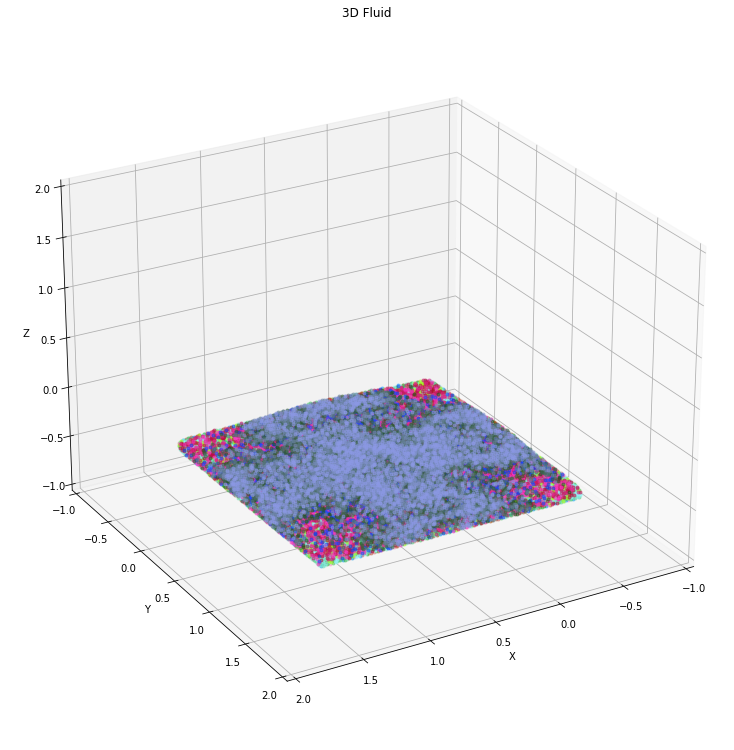

In [56]:
# k_list = [0.001]
# c_list = [0.0008]
# vort_list = [0.0002]
# # relax_list = np.around(np.arange(1000, 2000, step=200), 0)
# relax_list = [1600]

# tuning(k_list=k_list, c_list=c_list, vort_list=vort_list, relax_list=relax_list)

/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_99757/2097194709.py:60: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


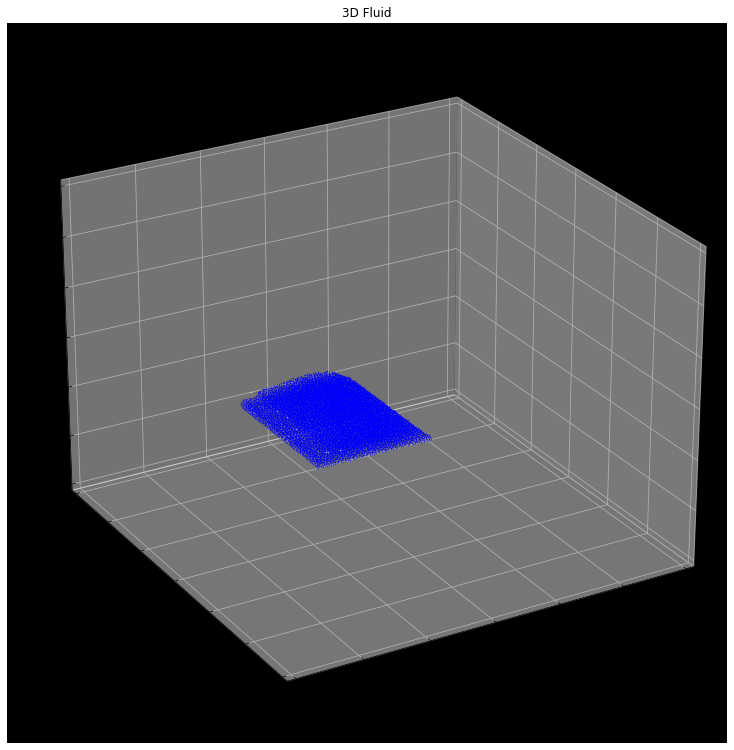

In [28]:
create_animation(420, 60, frame_skip=1, folder='.', out_file='diffuse')